In [30]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

import datetime
data = pd.read_excel('/Users/bell/Desktop/M5/uv_bottom_f35.xlsx',sheet_name='filtered',
                   parse_dates=['time'],index_col='time',converters={'U_filtered':float,'V_filtered':float})

In [37]:
data[data.U_filtered > 1e10] = np.nan
data[data.V_filtered > 1e10] = np.nan
data[data.U_filtered < -1e10] = np.nan
data[data.V_filtered < -1e10] = np.nan

In [38]:
data_daily = data.resample('D').mean()
climo = data_daily[:'2017'].groupby([data_daily[:'2017'].index.month, data_daily[:'2017'].index.day])

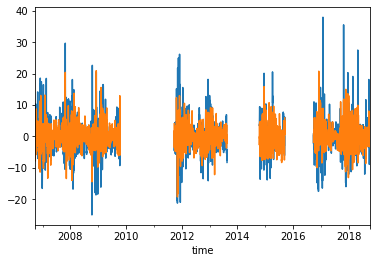

In [39]:
%matplotlib inline
data_daily.U_filtered.plot()
data_daily.V_filtered.plot()
data_daily['2018'].to_csv('/Users/bell/Desktop/M5/2018.csv')

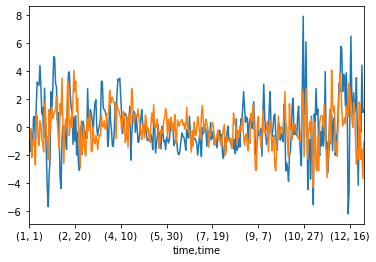

In [41]:
climo.mean().U_filtered.plot()
climo.mean().V_filtered.plot()
climo.mean().to_csv('/Users/bell/Desktop/M5/climo_2011-2017.csv')

In [45]:
anom = pd.read_excel('/Users/bell/Desktop/M5/uv_bottom_f35.xlsx',sheet_name='anom',
                   parse_dates=['time'],index_col='time')

In [50]:
anom_ave3d = anom.rolling(3,3).mean()

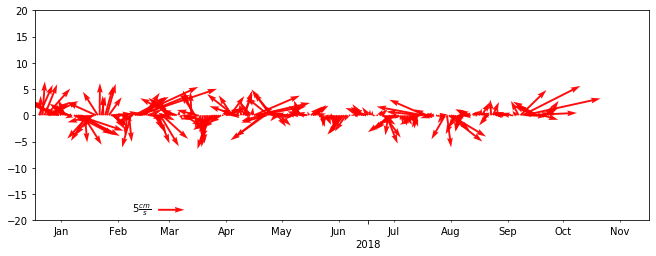

In [53]:

fig = plt.figure(1,figsize=(11,8.5))
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
q = ax1.quiver(anom_ave3d.index,0,anom_ave3d.U_anom,anom_ave3d.V_anom,color='r',units='y',scale_units='y',
                 scale = 1,alpha=.95)
qk = plt.quiverkey(q,0.2, 0.05, 5,r'$5 \frac{cm}{s}$',labelpos='W',
             fontproperties={'weight': 'bold'})
ax1.set_ylim([-20,20])
ax1.set_xlim('2018-1','2018-12')
ax1.xaxis.set_major_locator(YearLocator(month=7,day=1))
ax1.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
ax1.xaxis.set_tick_params(which='major', pad=15)

fig.savefig('2018M5_CurrentAnom_35filteredUV_3day_runningmean.png',dpi=300)

In [55]:
def rotate(udata,vdata,rotate=-60):
    #when rotating vectors - positive(+) rotation is equal to ccw of the axis (cw of vector)
    #                      - negative(-) rotation is equal to cw of the axis (ccw of the vector)
    print("rotating vectors {} degrees".format(rotate))
    angle_offset_rad = np.deg2rad(rotate)
    #error in calculation used corrected udata to correct vdata 2019/05
    uprime = udata*np.cos(angle_offset_rad) + vdata*np.sin(angle_offset_rad)
    vprime = -1.*udata*np.sin(angle_offset_rad) + vdata*np.cos(angle_offset_rad)
    udata=uprime
    vdata=vprime
    return(udata,vdata)

In [60]:
rotn60_u,rotn60_v=rotate(anom_ave3d.U_anom,anom_ave3d.V_anom)
rotp60_u,rotp60_v=rotate(anom_ave3d.U_anom,anom_ave3d.V_anom,rotate=60)

rotating vectors -60 degrees
rotating vectors 60 degrees


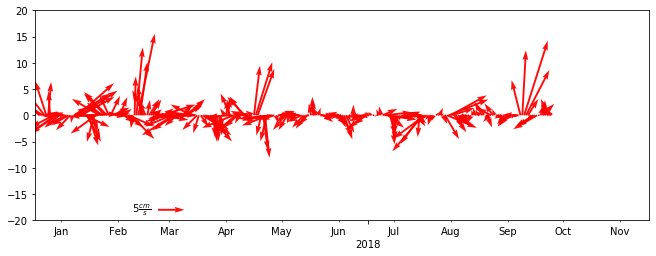

In [61]:

fig = plt.figure(1,figsize=(11,8.5))
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
q = ax1.quiver(anom_ave3d.index,0,rotn60_u,rotn60_v,color='r',units='y',scale_units='y',
                 scale = 1,alpha=.95)
qk = plt.quiverkey(q,0.2, 0.05, 5,r'$5 \frac{cm}{s}$',labelpos='W',
             fontproperties={'weight': 'bold'})
ax1.set_ylim([-20,20])
ax1.set_xlim('2018-1','2018-12')
ax1.xaxis.set_major_locator(YearLocator(month=7,day=1))
ax1.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
ax1.xaxis.set_tick_params(which='major', pad=15)

fig.savefig('2018M5_CurrentAnom_35filteredUV_3day_runningmean.png',dpi=300)

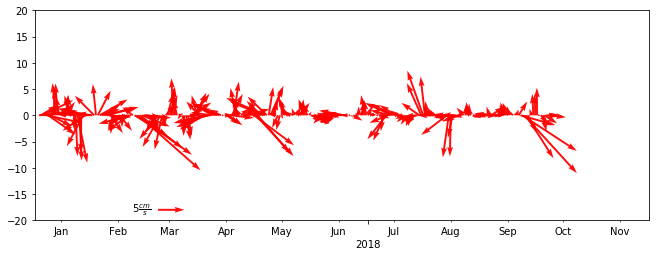

In [62]:

fig = plt.figure(1,figsize=(11,8.5))
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
q = ax1.quiver(anom_ave3d.index,0,rotp60_u,rotp60_v,color='r',units='y',scale_units='y',
                 scale = 1,alpha=.95)
qk = plt.quiverkey(q,0.2, 0.05, 5,r'$5 \frac{cm}{s}$',labelpos='W',
             fontproperties={'weight': 'bold'})
ax1.set_ylim([-20,20])
ax1.set_xlim('2018-1','2018-12')
ax1.xaxis.set_major_locator(YearLocator(month=7,day=1))
ax1.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
ax1.xaxis.set_tick_params(which='major', pad=15)

fig.savefig('2018M5_CurrentAnom_35filteredUV_3day_runningmean.png',dpi=300)